In [1]:
# Si hizo una instalación local, puede omitir esta celda
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=0c6d3c45d580df67be1d470f6bb4537db6cb1fcb620346ab54fbaf6c31e67bd6
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 64.9 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.result import marginal_distribution
import numpy as np

In [3]:
from qiskit_aer import AerSimulator
backend =  AerSimulator(method='statevector')

# Otras compuertas de un qubit

$$|\psi\rangle=\cos\tfrac{\theta}{2}|0\rangle+e^{i\phi}\sin\tfrac{\theta}{2}|1\rangle$$

$\bullet$ Verifique la acción de cada compuerta en el quantum composer.

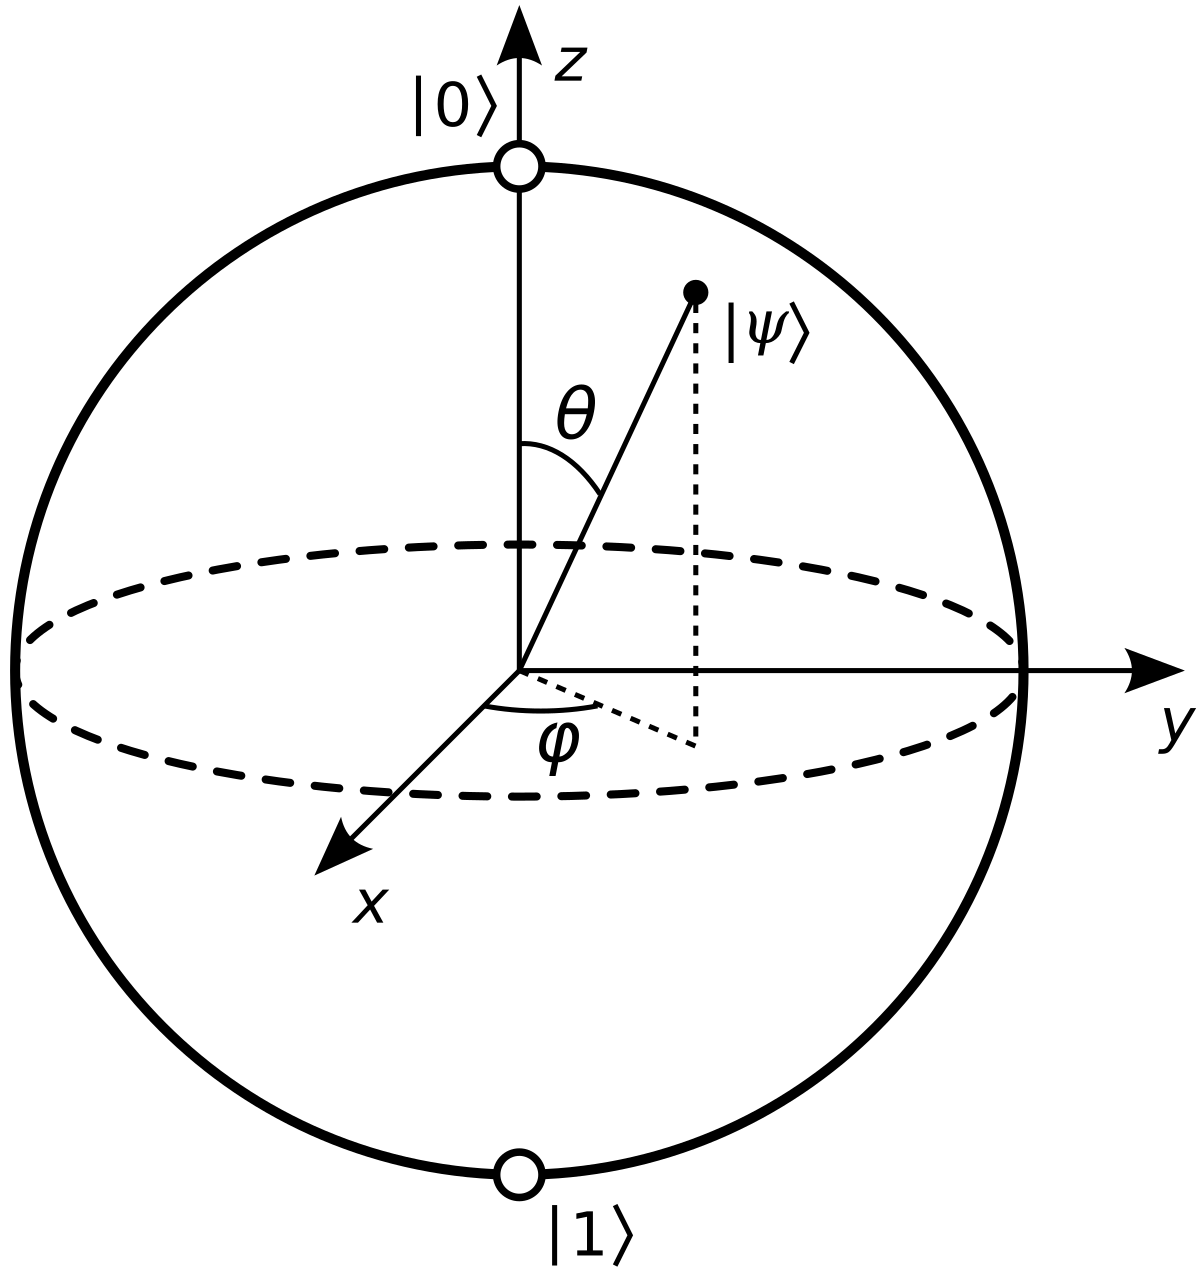

## Compuerta P

La compuerta de fase (phase),

$$ P(\phi) =
\begin{pmatrix}
1 & 0  \\
0 & e^{i\phi} \\
\end{pmatrix},
$$
es una rotación alrededor del eje $z$.

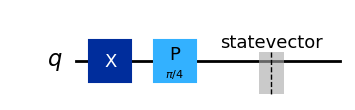

In [4]:
qc = QuantumCircuit(1)
qc.x(0)
qc.p(np.pi/4, 0)
qc.save_statevector()

qc.draw('mpl')

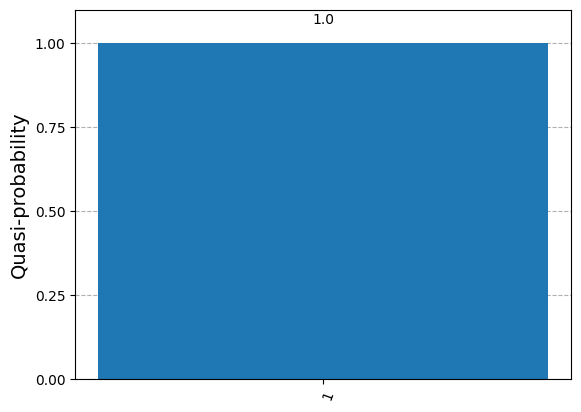

In [5]:
job = backend.run(qc,shots=1024)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

In [6]:
resultados.get_statevector()

Statevector([0.        +0.j        , 0.70710678+0.70710678j],
            dims=(2,))


## Compuerta S

$$S=\sqrt{Z}=
\begin{pmatrix}
1 & 0 \\
0 & e^{i\pi/2}
\end{pmatrix}
$$

$\bullet$ Ejercicio rápido:

$SS |\psi\rangle = ¿?$

Verifique su respuesta con qiskit.


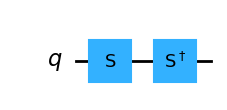

In [7]:
qc = QuantumCircuit(1)
qc.s(0)
qc.sdg(0)                   # Es común usar S^\dagger
qc.draw('mpl')

## La compuerta T

$$T=Z^{1/4}=
\begin{pmatrix}
1 & 0 \\
0 & e^{i\pi/4}
\end{pmatrix}
$$

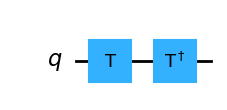

In [8]:
qc = QuantumCircuit(1)
qc.t(0)
qc.tdg(0)                   # Es común usar S^\dagger
qc.draw('mpl')

## Compuerta U

($\lambda$ en la ecuación corresponde a $\psi$ en la figura)

$$U(\theta,\phi,\lambda)=
\begin{pmatrix}
\cos\tfrac{\theta}{2} & -e^{i\lambda}\sin\tfrac{\theta}{2} \\
e^{i\phi}\sin\tfrac{\theta}{2} & e^{i(\lambda+\phi)}\cos\tfrac{\theta}{2}
\end{pmatrix}
$$

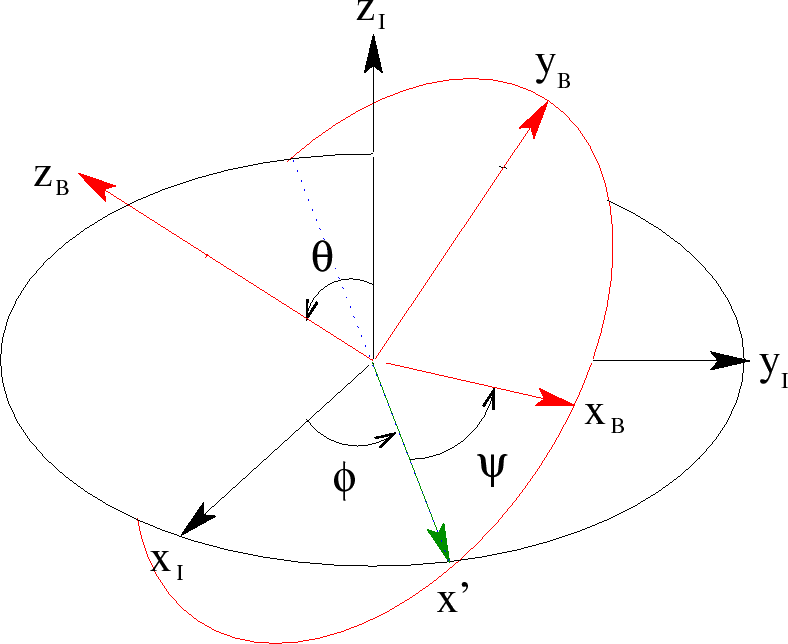

$\bullet$ Ejercicio: exprese a las compuertas $X$ y $H$ en términos de la compuerta $U$.

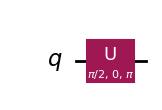

In [9]:
qc = QuantumCircuit(1)
qc.u(np.pi/2, 0, np.pi, 0)   # ¿Cuál es la acción de esta compuerta?
qc.draw('mpl')

## Compuertas de rotación alrededor de un eje


$$R_x(\theta)=
\begin{pmatrix}
\cos\tfrac{\theta}{2} & -i\sin\tfrac{\theta}{2} \\
-i\sin\tfrac{\theta}{2} & \cos\tfrac{\theta}{2}
\end{pmatrix},
\quad
R_y(\theta) =
\begin{pmatrix}
\cos\tfrac{\theta}{2} & -\sin \tfrac{\theta}{2} \\
\sin\tfrac{\theta}{2} & \cos\tfrac{\theta}{2}
\end{pmatrix},
\quad
R_z(\theta) =
\begin{pmatrix}
e^{-i\theta/2} & 0 \\
0 & e^{i\theta/2}
\end{pmatrix}
$$

$\bullet$ Verifique el efecto de estas rotaciones sobre un qubit, usando el *IBM quantum composer*.

# Compuertas de control arbitrario

Podemos crear una compuerta controlada donde la acción sobre el objetivo sea aplicar una compuerta unitaria arbitraria $U$,

$$c-U := I\otimes|0\rangle\langle0|+U\otimes|1\rangle\langle1|$$

**Recuerde cómo ordena qiskit los qubits.**

In [10]:
qc1 = QuantumCircuit(1)
qc1.u(np.pi/2, 0, np.pi, 0)
qc1.draw('mpl')

cU = qc1.to_gate(label='cU').control(1)  # cU indica cómo se identifica la compuerta

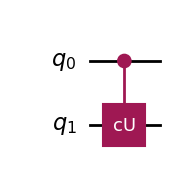

In [11]:
qc2 = QuantumCircuit(2)
qc2.append(cU, [0, 1])
qc2.draw('mpl')

# CNOT nuevamente

$\bullet$ Ejercicio: Discuta el resultado de la operación
$$CNOT(|-\rangle\otimes|+\rangle),$$  use qiskit o el *quantum composer*.